<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Styled HTML Template</title>
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Open+Sans:ital,wght@0,300..800;1,300..800&display=swap" rel="stylesheet">
</head>
<body style="font-family: 'Open Sans', sans-serif;">
    <h1 style="color: #2c3e50; font-weight: 700;">DSM020 Premier League Exploratory Analysis</h1>
    <p style="color: #AA6373; font-weight: 400;">Presented by: Jorge Forero L.</p>
    <p style="color: #AA6373; font-weight: 400;">Student Number: 240323983</p>
    <p style="color: #AA6373; font-weight: 400;">Student Portal Username: JEFL1</p>
</body>
</html>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load Data
Season2020 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2019-2020.csv'
Season2021 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2020-2021.csv'
Season2022 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2021-2022.csv'
Season2023 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2022-2023.csv'
Season2024 = '/Users/jorgeforero/University of London/DSM020 - Data Programming in Python/Premier_League_Data_Analysis/Season_2023-2024.csv'

df2020 = pd.read_csv(Season2020)
df2021 = pd.read_csv(Season2021)
df2022 = pd.read_csv(Season2022)
df2023 = pd.read_csv(Season2023)
df2024 = pd.read_csv(Season2024)

merged_df = pd.concat([df2020, df2021, df2022, df2023, df2024], ignore_index=True)

In [3]:
# Find the index of the column 'AvgA'
avg_a_index = merged_df.columns.get_loc('AvgA')

# Select all columns up to and including 'AvgA'
columns_to_keep = merged_df.columns[:avg_a_index + 1]

# Create a new DataFrame with only the selected columns
filtered_df = merged_df[columns_to_keep]

# Check the result
print(filtered_df.head())
print(filtered_df.columns)

  Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG  ...    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0     4     0  ...  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1     0     1  ...   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2     0     0  ...   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3     0     0  ...   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4     0     0  ...   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  
0  8.75  19.83  
1  6.28   1.25  
2  3.53   3.83  
3  3.2

In [4]:
#Missing Values
missing_values = filtered_df.isnull().sum()

print("Missing values per column")
print(missing_values)
print(filtered_df.info)

Missing values per column
Div           0
Date          0
Time          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
Referee       0
HS            0
AS            0
HST           0
AST           0
HF            0
AF            0
HC            0
AC            0
HY            0
AY            0
HR            0
AR            0
B365H         0
B365D         0
B365A         0
BWH           2
BWD           2
BWA           2
IWH         182
IWD         182
IWA         182
PSH           0
PSD           0
PSA           0
WHH           0
WHD           0
WHA           0
VCH           0
VCD           0
VCA           0
MaxH          0
MaxD          0
MaxA          0
AvgH          0
AvgD          0
AvgA          0
dtype: int64
<bound method DataFrame.info of      Div        Date   Time          HomeTeam          AwayTeam  FTHG  FTAG  \
0     E0  09/08/2019  20:00         Liverpool           Norwich     4     1   
1  

In [5]:
# Step 2: Drop Specific Columns 'IWH', 'IWD', 'IWA'
columns_to_drop = ['IWH', 'IWD', 'IWA']
filtered_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' ensures no error if columns not present

# Check the result
print(filtered_df.head())
print(filtered_df.columns)

  Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG  ...    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0     4     0  ...  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1     0     1  ...   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2     0     0  ...   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3     0     0  ...   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4     0     0  ...   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  
0  8.75  19.83  
1  6.28   1.25  
2  3.53   3.83  
3  3.2

In [6]:
#Missing Values
missing_values = filtered_df.isnull().sum()

print("Missing values per column")
print(missing_values)
print(filtered_df.info)

Missing values per column
Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
BWH         2
BWD         2
BWA         2
PSH         0
PSD         0
PSA         0
WHH         0
WHD         0
WHA         0
VCH         0
VCD         0
VCA         0
MaxH        0
MaxD        0
MaxA        0
AvgH        0
AvgD        0
AvgA        0
dtype: int64
<bound method DataFrame.info of      Div        Date   Time          HomeTeam          AwayTeam  FTHG  FTAG  \
0     E0  09/08/2019  20:00         Liverpool           Norwich     4     1   
1     E0  10/08/2019  12:30          West Ham          Man City     0     5   
2     E0  10/08/2019  15:00       Bournemouth  Sheffield Unite

In [7]:
filtered_df.dropna(inplace=True)

In [9]:
numerical_var = filtered_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_var = filtered_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical variables:", numerical_var)
print("Categorical variables:", categorical_var)

Numerical variables: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
Categorical variables: ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']


In [13]:
# Convert date and time column
filtered_df['datetime'] = pd.to_datetime(merged_df['Date'] + ' ' + merged_df['Time'], errors='coerce')


In [14]:
print(filtered_df.head())

  Div       Date                Time        HomeTeam          AwayTeam  FTHG  \
0  E0 2019-09-08 2024-07-18 20:00:00       Liverpool           Norwich     4   
1  E0 2019-10-08 2024-07-18 12:30:00        West Ham          Man City     0   
2  E0 2019-10-08 2024-07-18 15:00:00     Bournemouth  Sheffield United     1   
3  E0 2019-10-08 2024-07-18 15:00:00         Burnley       Southampton     3   
4  E0 2019-10-08 2024-07-18 15:00:00  Crystal Palace           Everton     0   

   FTAG FTR  HTHG  HTAG  ...    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0     1   H     4     0  ...   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1     5   A     0     1  ...  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2     1   D     0     0  ...   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3     0   H     0     0  ...   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4     0   D     0     0  ...   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA            datetime  
0  8.75

BASIC DESCRIPTIVE STATISTICS

In [16]:
numerical_var = filtered_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_var = filtered_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical variables:", numerical_var)
print("Categorical variables:", categorical_var)

Numerical variables: ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
Categorical variables: ['Div', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']


In [19]:
#To calculate cardinality
cardinality = {var: len(filtered_df[var].value_counts()) for var in categorical_var}

#From dictionaries to DF
df_cardinality = pd.DataFrame(list(cardinality.items()), columns=['Variable', 'Cardinality'])
#Sorting
df_cardinality = df_cardinality.sort_values(by='Cardinality', ascending=False)

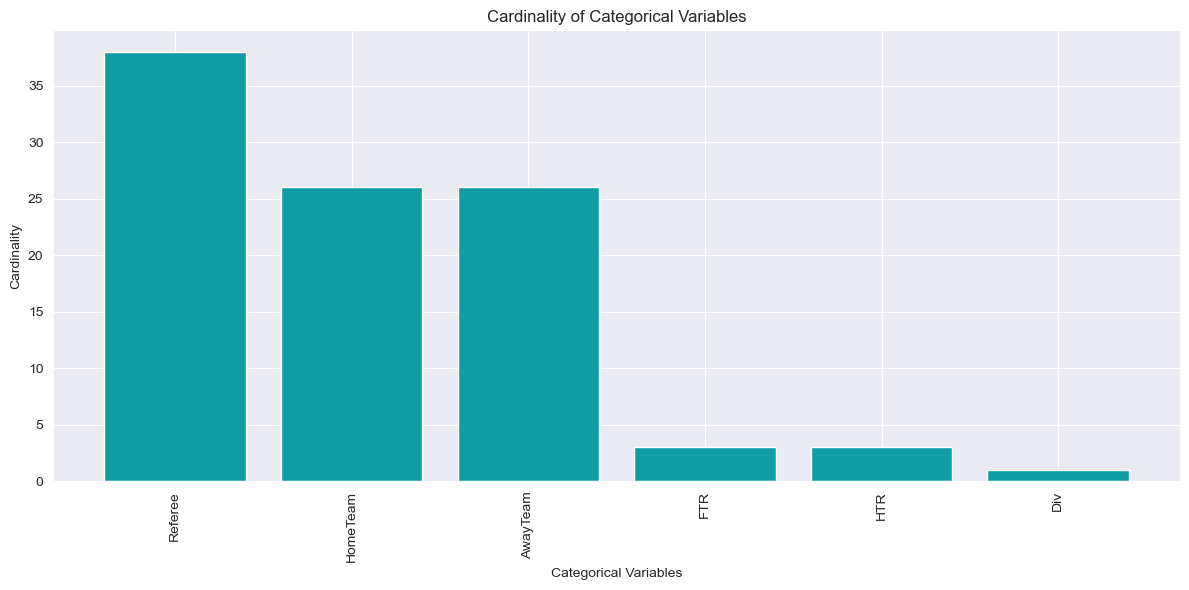

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(df_cardinality['Variable'], df_cardinality['Cardinality'], color='#119DA4')
plt.xlabel('Categorical Variables')
plt.ylabel('Cardinality')
plt.title('Cardinality of Categorical Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
# Summary statistics for numerical columns
numerical_summary = filtered_df[numerical_var].describe(include='all')
print("Summary Statistics for Numerical Variables:\n", numerical_summary)

# Calculate mode for numerical columns
numerical_mode = filtered_df[numerical_var].mode().iloc[0]
print("\nMode for Numerical Variables:\n", numerical_mode)


Summary Statistics for Numerical Variables:
               FTHG         FTAG         HTHG         HTAG           HS  \
count  1898.000000  1898.000000  1898.000000  1898.000000  1898.000000   
mean      1.563751     1.310327     0.708114     0.586934    13.862487   
std       1.344817     1.239445     0.859777     0.789412     5.746861   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000     0.000000     0.000000     0.000000    10.000000   
50%       1.000000     1.000000     1.000000     0.000000    13.000000   
75%       2.000000     2.000000     1.000000     1.000000    17.000000   
max       9.000000     9.000000     5.000000     5.000000    36.000000   

                AS          HST          AST           HF           AF  ...  \
count  1898.000000  1898.000000  1898.000000  1898.000000  1898.000000  ...   
mean     11.603793     4.821918     4.111170    10.621707    10.798209  ...   
std       5.188693     2.638650     2.428258     3.

In [23]:
# Summary statistics for categorical columns
categorical_summary = filtered_df[categorical_var].describe(include='all')
print("\nSummary Statistics for Categorical Variables:\n", categorical_summary)

# Mode for categorical columns
categorical_mode = filtered_df[categorical_var].mode().iloc[0]
print("\nMode for Categorical Variables:\n", categorical_mode)



Summary Statistics for Categorical Variables:
          Div   HomeTeam AwayTeam   FTR   HTR   Referee
count   1898       1898     1898  1898  1898      1898
unique     1         26       26     3     3        38
top       E0  Liverpool  Chelsea     H     D  A Taylor
freq    1898         95       95   838   743       145

Mode for Categorical Variables:
 Div               E0
HomeTeam     Arsenal
AwayTeam     Arsenal
FTR                H
HTR                D
Referee     A Taylor
Name: 0, dtype: object


Distribution outcomes

In [24]:
# Count the occurrences of each result in Full Time Result (FTR)
ftr_counts = filtered_df['FTR'].value_counts()
print("\nDistribution of Match Results (Full Time):\n", ftr_counts)

# If you also have Half Time Result (HTR) and want to analyze it
htr_counts = filtered_df['HTR'].value_counts()
print("\nDistribution of Match Results (Half Time):\n", htr_counts)



Distribution of Match Results (Full Time):
 FTR
H    838
A    630
D    430
Name: count, dtype: int64

Distribution of Match Results (Half Time):
 HTR
D    743
H    651
A    504
Name: count, dtype: int64


In [25]:
# If you also have Half Time Result (HTR) and want to analyze it
htr_counts = filtered_df['HTR'].value_counts()
print("\nDistribution of Match Results (Half Time):\n", htr_counts)


Distribution of Match Results (Half Time):
 HTR
D    743
H    651
A    504
Name: count, dtype: int64



Home Goals Statistics:
 count    1898.000000
mean        1.563751
std         1.344817
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTHG, dtype: float64

Away Goals Statistics:
 count    1898.000000
mean        1.310327
std         1.239445
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: FTAG, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


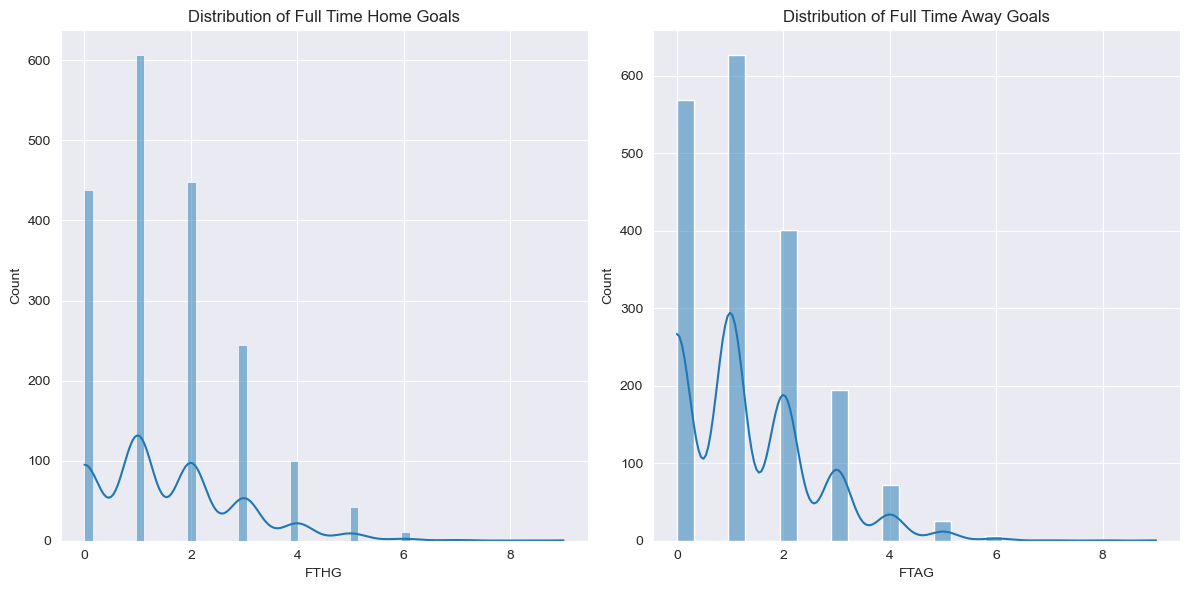

In [26]:
# Goals Analysis
home_goals_stats = filtered_df['FTHG'].describe()
away_goals_stats = filtered_df['FTAG'].describe()
print("\nHome Goals Statistics:\n", home_goals_stats)
print("\nAway Goals Statistics:\n", away_goals_stats)

# Plot the distribution of goals scored by home and away teams
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_df['FTHG'], kde=True)
plt.title('Distribution of Full Time Home Goals')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['FTAG'], kde=True)
plt.title('Distribution of Full Time Away Goals')

plt.tight_layout()
plt.show()

In [31]:
# Define numerical columns
numerical_columns = ['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
                     'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'PSH', 'PSD',
                     'PSA', 'WHH',  'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
                     'AvgD', 'AvgA']

categorical_columns = ['Div', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']

# Convert numerical columns to numeric, forcing errors to NaN
for col in numerical_columns:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

# Identify columns with infinite values
infinite_columns = filtered_df.columns.to_series()[np.isinf(filtered_df.to_numpy()).any()]
print("Columns with infinite values:\n", infinite_columns)

# Display rows with infinite values
infinite_rows = filtered_df[np.isinf(filtered_df.to_numpy()).any(axis=1)]
print("\nRows with infinite values:\n", infinite_rows)

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''